In [ ]:
import numpy as np
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector

### Kwantowa transformata Fouriera - wprowadzenie

Kwantowa transformata Fouriera (QFT) jest kwantową implementacją dyskretnej transformaty Fouriera. Jest ona istotną częścią wielu algorytmów kwantowych, w szczególności algorytmu faktoryzacji Shora i kwantowej estymacji fazy. 
Dyskretna transformata Fouriera działa na wektor $(x_0, ..., x_{N-1})$ i przeprowadza go w wektor  $(y_0, ..., y_{N-1})$ zgodnie z wzorem:
$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk}$$

gdzie $\omega_N^{jk} = e^{2\pi i \frac{jk}{N}}$.

Podobnie, kwantowa transformata Fouriera działa na stan kwantowy $\vert X\rangle = \sum_{j=0}^{N-1} x_j \vert j \rangle$ i przeprowadza go w stan kwantowy $\vert Y\rangle = \sum_{k=0}^{N-1} y_k \vert k \rangle$ zgodnie z wzorem:

$$y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_j\omega_N^{jk}$$

gdzie ponownie $\omega_N^{jk} = e^{2\pi i \frac{jk}{N}}$. 

Można to zapisać także jako przekształcenie działające na stany bazowe:  

$$\vert j \rangle \mapsto \frac{1}{\sqrt{N}}\sum_{k=0}^{N-1}\omega_N^{jk} \vert k \rangle$$

Albo macierz unitarną:  

$$ U_{QFT} = \frac{1}{\sqrt{N}} \sum_{j=0}^{N-1} \sum_{k=0}^{N-1} \omega_N^{jk} \vert k \rangle \langle j \vert$$

#### Kwantowa transformata Fouriera w jednym wymiarze (jeden kubit)

**Zadanie.** Obliczyć wynik działania operatora QFT na stan  $\vert\psi\rangle = \alpha \vert 0 \rangle + \beta \vert 1 \rangle$. Czy znasz bramkę kwantową, która wykonuje właśnie taką transformację?  

#### Baza standardowa vs baza Fouriera

Można patrzeć na kwantową transformatę Fouriera jak na przekształcenie przeprowadzające stany z bazy obliczeniowej do bazy Fouriera.  

W jednym wymiarze - QFT jest realizowane przez bramkę Hadamarda, która transformuje stany bazowe bazy obliczeniowej ( $|0\rangle$, $|1\rangle$) w stany bazowe bazy diagonalnej ($|{+}\rangle$, $|{-}\rangle$). Podobnie, stany wielokubitowe mają odpowiadające im stany w bazie Fouriera. QFT jest przekształceniem, które wykonuje transformację między tymi bazami.  

$$
|\text{stan w bazie obliczeniowej}\rangle \quad \xrightarrow[]{\text{QFT}} \quad |\text{stan w bazie Fouriera}\rangle
$$

$$
\text{QFT}|x\rangle = |\widetilde{x}\rangle
$$


#### Implementacja QFT dla trzech kubitów


**Bramka controlled phase CP**

$$
CP(\theta) =
\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 0 & 0 & e^{i\theta}\end{bmatrix}
$$

In [ ]:
# Stworzenie obwodu

qc = QuantumCircuit(3)

# -----

# -----

qc.draw(output="mpl")

In [ ]:
# Narysowanie stanu kodującego liczbę 5 na trzech kubitach + wizualizacja

qc = QuantumCircuit(3)
qc.x(0)
qc.x(1)
statevector = Statevector.from_instruction(qc)
plot_bloch_multivector(statevector)

In [ ]:
# Zadziałanie transformatą Fouriera + wizualizacja

... # uzupełnić bramki

statevector = Statevector.from_instruction(qc)
plot_bloch_multivector(statevector)

#### Kwantowa transformata Fouriera dla $n$ kubitów  
**Zadanie.** Napisać funkcję, która wygeneruje obwód kwantowy liczący kwantową transformatę Fouriera na $n$ kubitach, gdzie $n$ to liczba naturalna. 

In [5]:
def qft(circuit, n):

    pass

In [ ]:
qc = QuantumCircuit(4)
qft(qc,4)
qc.draw(output="mpl")

**Zadanie.** Zwizualizować przy pomocy `plot_bloch_multivector` jak wygląda stany reprezentujące kolejne liczby naturalne (np. na 4 kubitach) przed i po zadziałaniu QFT.  

In [ ]:
qc = QuantumCircuit(4)
qc.x(1)
statevector = Statevector.from_instruction(qc)
plot_bloch_multivector(statevector)

In [ ]:
qft(qc,4)
statevector = Statevector.from_instruction(qc)
plot_bloch_multivector(statevector)

#### Odwrotna transformata Fouriera

Operację odwrotną możemy łatwo zaimplementować korzystając z wbudowanej metody `.inverse()`

In [9]:
def get_qft_circuit(n):
    qc = QuantumCircuit(n)
    qft(qc, n)
    return qc


def get_inverse_qft_circuit(n):
    qft_circ = get_qft_circuit(n)
    inverse_qft_circ = qft_circ.inverse()
    return inverse_qft_circ.decompose()

**Zadanie.** Sprawdzić, że po zadziałaniu na stan kwantową transformatą Fouriera, a następnie odwrotną transformatą Fouriera, dostaniemy z powrotem początkowy stan.

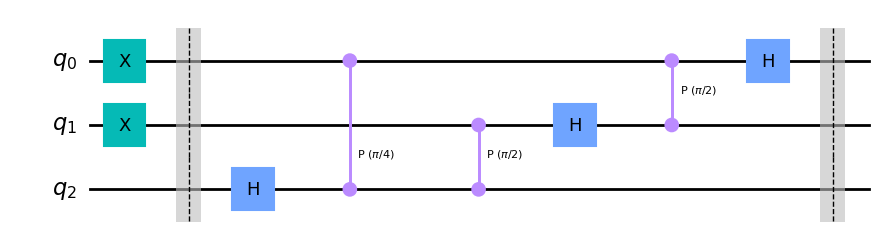

In [10]:
n=3

# Przygotowanie stanu początkowego
circuit = QuantumCircuit(n)
circuit.x(0)
circuit.x(1)
circuit.barrier()

# Transformata Fouriera
qft_circuit = get_qft_circuit(n)
circuit = circuit.compose(qft_circuit)
circuit.barrier()
circuit.draw(output="mpl")

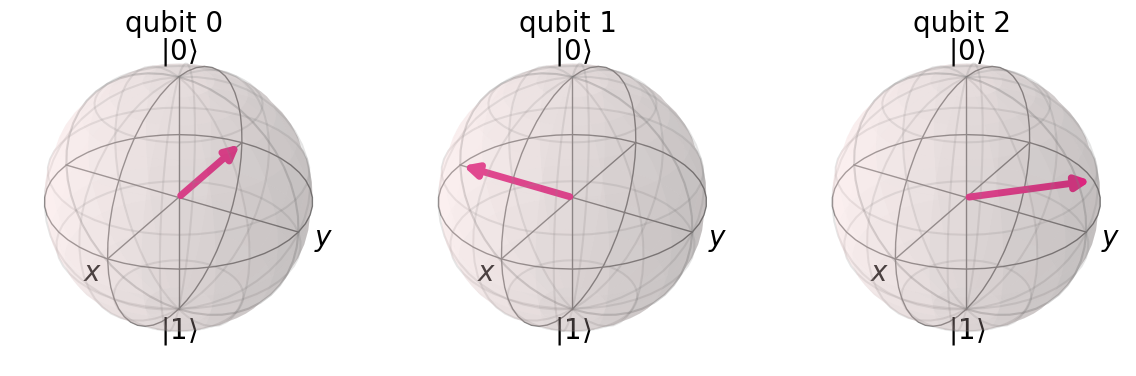

In [11]:
# Wyświetlenie stanu po transformacie Fouriera
statevector = Statevector.from_instruction(circuit)
plot_bloch_multivector(statevector)

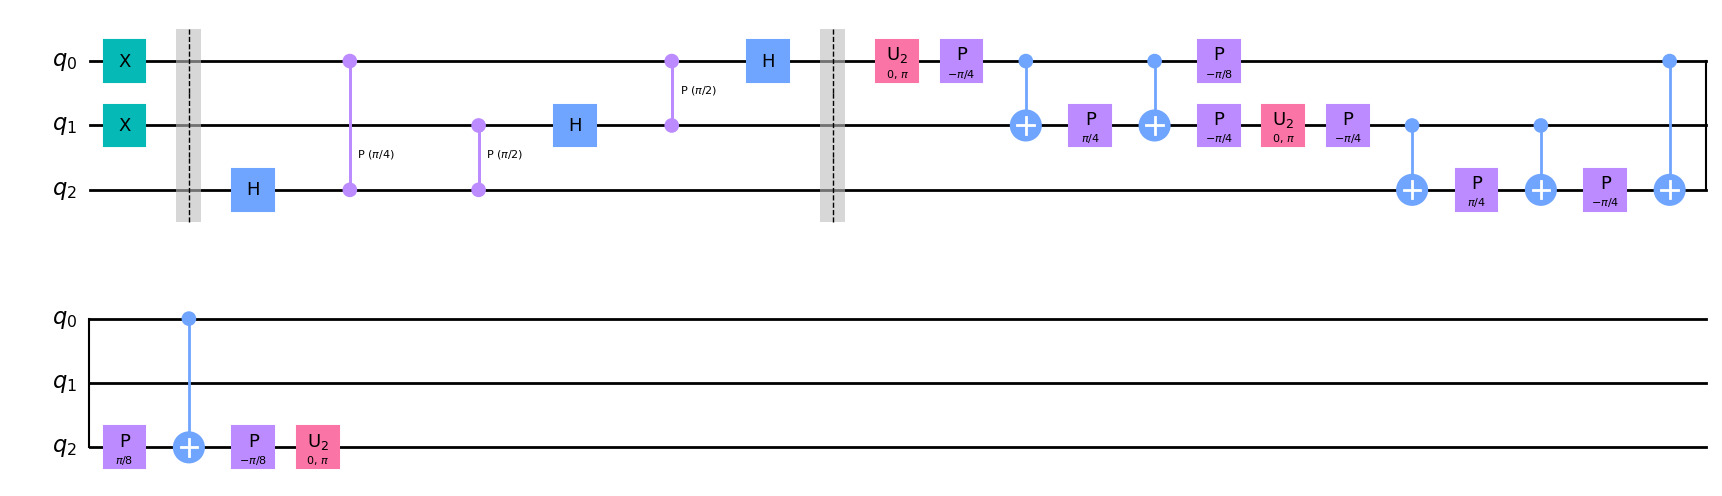

In [12]:
# Dodanie odwrotnej transformaty Fouriera do obwodu
inverse_qft_circuit = get_inverse_qft_circuit(n)
circuit = circuit.compose(inverse_qft_circuit)
circuit.draw(output="mpl")

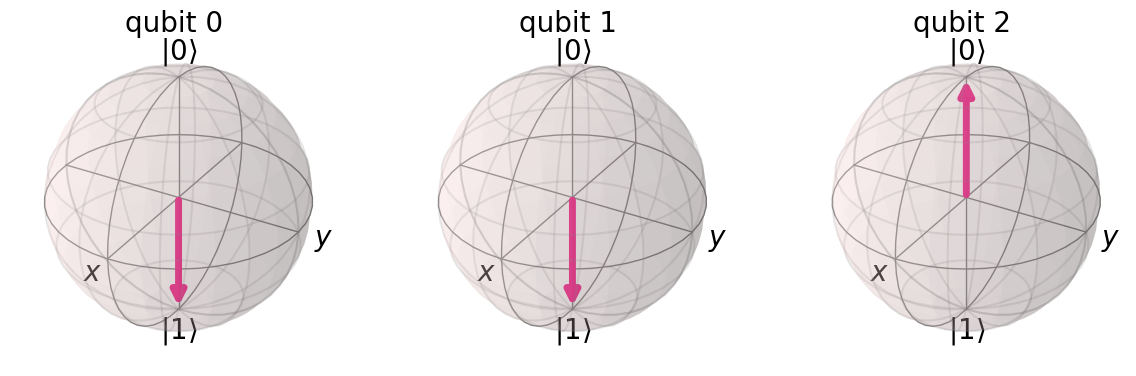

In [13]:
# Wyświetlenie stanu po odwróceniu transformaty Fouriera (powinniśmy widzieć stan początkowy układu)
statevector = Statevector.from_instruction(circuit)
plot_bloch_multivector(statevector)